**1**. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [56]:
# https://github.com/edenkabada/Machine-Learning_ex1

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-57-8017810b4af0>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsne_df['label'].replace(0.0, 'Malignant',inplace=True)


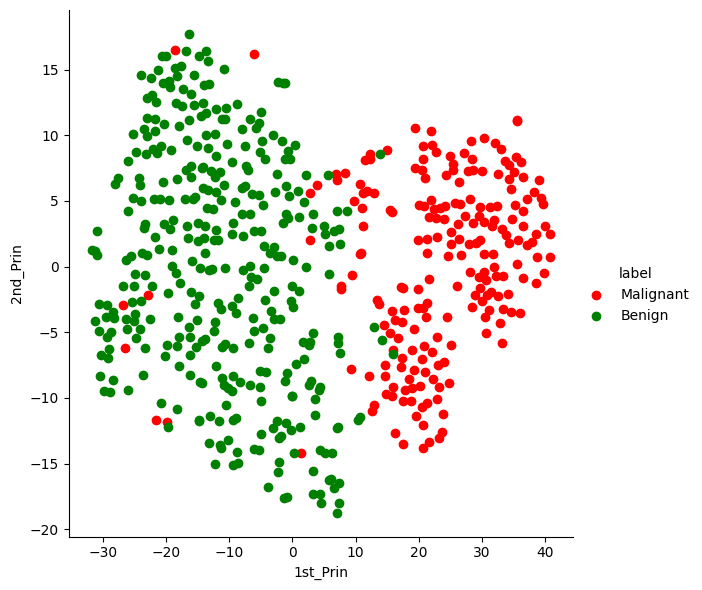

In [57]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw_data = my_data.data
normalized_data = StandardScaler().fit_transform(raw_data)
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(normalized_data)
tsne_df = pd.DataFrame(np.vstack((tsne_data.T, my_data.target)).T,
                      columns = ['1st_Prin', '2nd_Prin', 'label'])
tsne_df['label'].replace(0.0, 'Malignant',inplace=True)
tsne_df['label'].replace(1.0, 'Benign',inplace=True)
pal = dict(Malignant="red", Benign="green")
ax = sns.FacetGrid(tsne_df, hue='label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2nd_Prin').\
                   add_legend()
plt.show()



3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [58]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(my_data.data, my_data.target, test_size=0.2, train_size=0.8, random_state=42,
                                                    shuffle=True, stratify=None)



4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [59]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=6, ccp_alpha=0.01)
model_decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', min_samples_split=6)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [60]:
from math import sqrt
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(criterion='entropy', min_samples_split=5, min_weight_fraction_leaf=0.3)
model_random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       min_weight_fraction_leaf=0.3)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [61]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100, algorithm='SAMME')
model_adaboost.fit(X_train, Y_train)


AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# model_decision_tree
y_pred_model_dt = model_decision_tree.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_model_dt, normalize=True, sample_weight=None)
confusion_matrix_dt = confusion_matrix(Y_test, y_pred_model_dt, labels=None, sample_weight=None, normalize=None)
precision_dt = precision_score(Y_test, y_pred_model_dt, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
recall_dt = recall_score(Y_test, y_pred_model_dt, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
f1_dt = f1_score(Y_test, y_pred_model_dt, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_dt}")
print(f"Confusion Matrix:\n{confusion_matrix_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")
print("\n")

# model_random_forest
y_pred_model_rf = model_random_forest.predict(X_test)
accuracy_rf = accuracy_score(Y_test, y_pred_model_rf, normalize=True, sample_weight=None)
confusion_matrix_rf = confusion_matrix(Y_test, y_pred_model_rf, labels=None, sample_weight=None, normalize=None)
precision_rf = precision_score(Y_test, y_pred_model_rf, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
recall_rf = recall_score(Y_test, y_pred_model_rf, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
f1_rf = f1_score(Y_test, y_pred_model_rf, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_matrix_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("\n")

# model_adaboost
y_pred_model_ab = model_adaboost.predict(X_test)
accuracy_ab = accuracy_score(Y_test, y_pred_model_ab, normalize=True, sample_weight=None)
confusion_matrix_ab = confusion_matrix(Y_test, y_pred_model_ab, labels=None, sample_weight=None, normalize=None)
precision_ab = precision_score(Y_test, y_pred_model_ab, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
recall_ab = recall_score(Y_test, y_pred_model_ab, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
f1_ab = f1_score(Y_test, y_pred_model_ab, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
print("AdaBoost Results:")
print(f"Accuracy: {accuracy_ab}")
print(f"Confusion Matrix:\n{confusion_matrix_ab}")
print(f"Precision: {precision_ab}")
print(f"Recall: {recall_ab}")
print(f"F1 Score: {f1_ab}")
print("\n")

# decisive metric: accuracy
model_winner = "decision tree"
max_value = accuracy_dt
if accuracy_rf > max_value:
  model_winner = "random forest"
  max_value = accuracy_rf
if accuracy_ab > max_value:
  model_winner = "AdaBoost"
  max_value = accuracy_ab

print(f"The winner model according accuracy is: {model_winner}")








Decision Tree Results:
Accuracy: 0.956140350877193
Confusion Matrix:
[[39  4]
 [ 1 70]]
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793104


Random Forest Results:
Accuracy: 0.956140350877193
Confusion Matrix:
[[38  5]
 [ 0 71]]
Precision: 0.9342105263157895
Recall: 1.0
F1 Score: 0.9659863945578231


AdaBoost Results:
Accuracy: 0.9736842105263158
Confusion Matrix:
[[41  2]
 [ 1 70]]
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


The winner model according accuracy is: AdaBoost
